<img src="fireblaze.jpg" width=250 height=200 />

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')

In [3]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
X = df.iloc[:,[2,3]].values

In [8]:
X.shape

(200, 2)

In [9]:
from sklearn.cluster import KMeans

In [10]:
obj_fun = []
for i in range(1,11):
    clustering = KMeans(n_clusters=i, init='k-means++')
    clustering.fit(X)
    obj_fun.append(clustering.inertia_)
obj_fun

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 30259.657207285458,
 24986.52564064289,
 21829.135638779822,
 19794.209660582503]

In [11]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#wcss

/Users/aniruddhakalbande/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


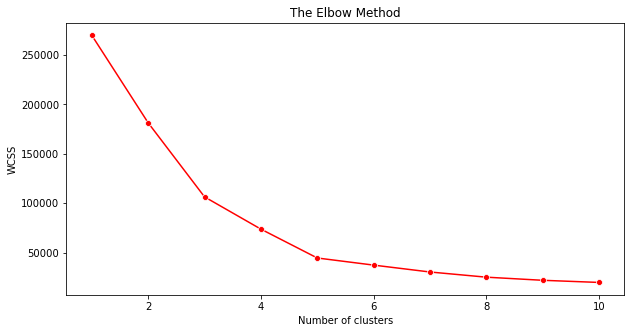

In [12]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(range(1,11), wcss, marker='o', color='red')

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [13]:
fig.savefig('elbow_method.png')
plt.close(fig)

In [14]:
#fitting

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_means = kmeans.fit_predict(X)

In [15]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

/Users/aniruddhakalbande/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/aniruddhakalbande/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/aniruddhakalbande/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

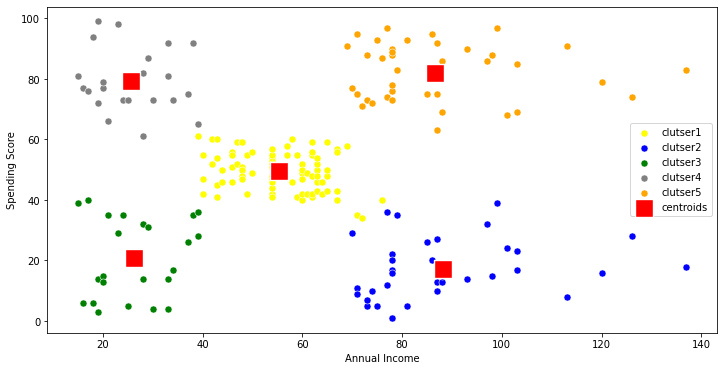

In [16]:
#visualisuing the clusters
plt.figure(figsize=(12,6))

sns.scatterplot(X[y_means==0,0], X[y_means==0,1], color='yellow', label='clutser1',s=50)
sns.scatterplot(X[y_means==1,0], X[y_means==1,1], color='blue', label='clutser2',s=50)
sns.scatterplot(X[y_means==2,0], X[y_means==2,1], color='green', label='clutser3',s=50)
sns.scatterplot(X[y_means==3,0], X[y_means==3,1], color='grey', label='clutser4',s=50)
sns.scatterplot(X[y_means==4,0], X[y_means==4,1], color='orange', label='clutser5',s=50)

sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red',label='centroids', s=300, marker=',')

plt.grid(False)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [17]:
dataset = pd.read_csv('Mall_Customers.csv')

In [18]:
X = dataset.iloc[:,[3,4]].values

In [19]:
import scipy.cluster.hierarchy as sch

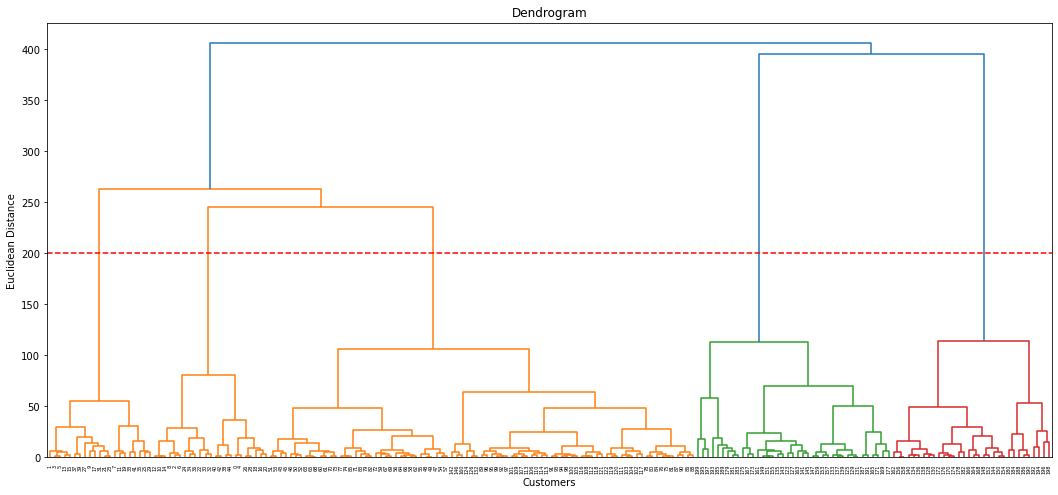

In [20]:
plt.figure(figsize=(18,8))

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.axhline(y=200, color='r', linestyle='--')

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')

plt.show()

In [21]:
#train the model

tuned_clustering = KMeans(n_clusters=5, init='k-means++', random_state=0)

label = tuned_clustering.fit_predict(X)

In [22]:
from sklearn import metrics

In [23]:
metrics.silhouette_score(X, tuned_clustering.labels_, metric='euclidean')

0.553931997444648

# Agglomerative Clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
clustering_model = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')

In [26]:
clustering_model.fit(dataset.iloc[:,[3,4]].values)

AgglomerativeClustering(n_clusters=5)

In [27]:
clustering_prediction = clustering_model.fit_predict(dataset.iloc[:,[3,4]])

In [28]:
metrics.silhouette_score(X, clustering_prediction, metric='euclidean')

0.5529945955148897

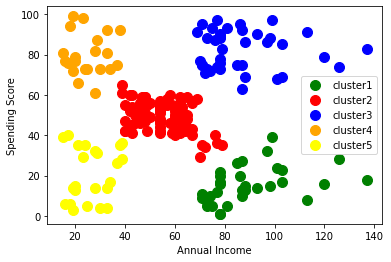

In [29]:
plt.scatter(dataset.iloc[:,[3,4]].values[clustering_prediction==0,0], dataset.iloc[:,[3,4]].values[clustering_prediction==0,1], s=100, c='green',
           label='cluster1')


plt.scatter(dataset.iloc[:,[3,4]].values[clustering_prediction==1,0], 
            dataset.iloc[:,[3,4]].values[clustering_prediction==1,1], s=100, 
            c='red',
           label='cluster2')

plt.scatter(dataset.iloc[:,[3,4]].values[clustering_prediction==2,0], 
            dataset.iloc[:,[3,4]].values[clustering_prediction==2,1], s=100, 
            c='blue',
           label='cluster3')

plt.scatter(dataset.iloc[:,[3,4]].values[clustering_prediction==3,0], 
            dataset.iloc[:,[3,4]].values[clustering_prediction==3,1], s=100, 
            c='orange',
           label='cluster4')

plt.scatter(dataset.iloc[:,[3,4]].values[clustering_prediction==4,0], 
            dataset.iloc[:,[3,4]].values[clustering_prediction==4,1], s=100, 
            c='yellow',
           label='cluster5')


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# DBSCAN

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
clustering_model = DBSCAN(eps=9, min_samples=5)

In [32]:
clustering_model.fit(X)

DBSCAN(eps=9)

In [33]:
predict_labels = clustering_model.labels_

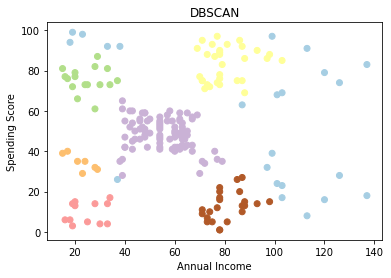

In [34]:
plt.scatter(X[:,0], X[:,1], c=predict_labels, cmap='Paired')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('DBSCAN')

plt.show()